###### credit : Jose Portilla, Pierian Data www.pieriantraining.com

## Data

The SMS Spam Collection v.1 corpus (http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/) 
<br>
by Tiago Agostinho de Almeida (http://www.dt.fee.unicamp.br/~tiago) and Jose Maria Gomez Hidalgo (http://www.esp.uem.es/jmgomez) 

In [1]:
import nltk

In [2]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [3]:
print(len(messages))

5574


In [4]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

##### First 10 messages

In [5]:
for mess_no, message in enumerate(messages[:10]) :
    print(mess_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [6]:
messages[0]    # \t : tab seperation

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

##### Data Frame

In [7]:
import pandas as pd

In [8]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep = '\t', names = ['label', 'message'])

In [9]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## EDA

In [10]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [12]:
# Add msg lengths
messages['length'] = messages['message'].apply(len)

In [13]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Message Length Distribution

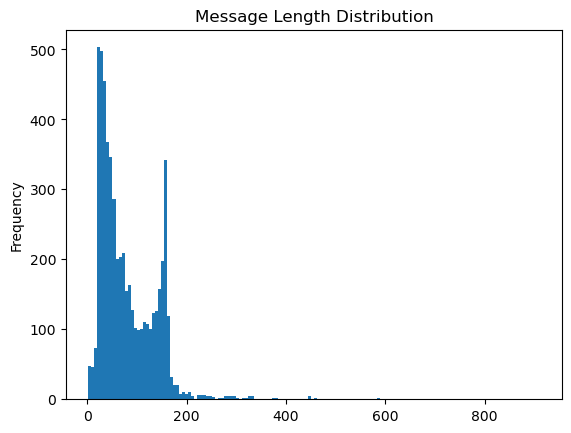

In [15]:
messages['length'].plot.hist(bins = 150)

plt.title('Message Length Distribution')
plt.show()

In [16]:
messages['length'].describe()    # max length : 910

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [17]:
# Find which one is it
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

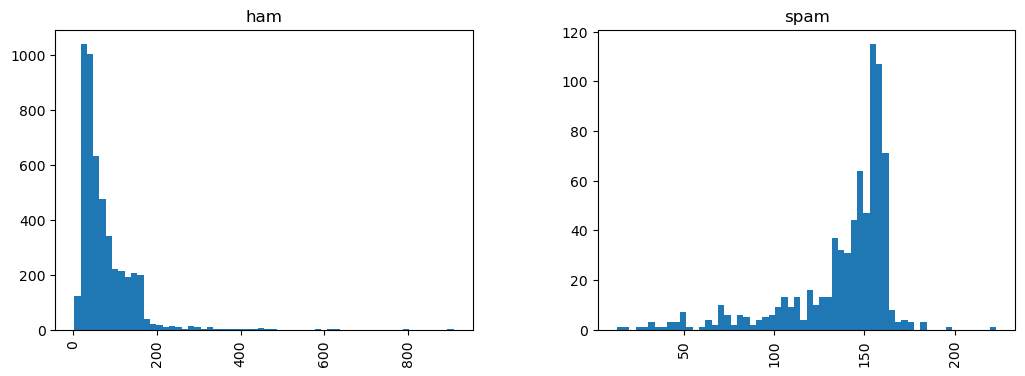

In [18]:
# Is msg length a distictive feature?
messages.hist(column = 'length', by = 'label', bins = 60, figsize = (12, 4))

In [19]:
# Spam msgs tend to have more characters

## Natural Language Processing

In [20]:
import string

##### Remove punctuation example

In [22]:
mess = 'Sample message! Notice: it has punctuation'

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
nopunc = [c for c in mess if c not in string.punctuation]

In [25]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

##### Remove common words

In [26]:
from nltk.corpus import stopwords

In [27]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
nopunc = ''.join(nopunc)

In [29]:
nopunc

'Sample message Notice it has punctuation'

##### Final cleaned msg example


In [31]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [32]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

##### Cleaning up & Tokenisation of the corpus

In [33]:
def text_process(mess) :           # mess : original msg
    """
    1. remove punc
    2. remove stop words
    3. return list of clean text words
    """
    
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [34]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

##### Vectorisation

In [35]:
# 1. Count how many times does a word occur in each message (Known as term frequency)
# 2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)
# 3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['message'])

In [38]:
print(len(bow_transformer.vocabulary_))

11425


In [39]:
mess4 = messages['message'][3]

In [40]:
print(mess4)

U dun say so early hor... U c already then say...


In [41]:
bow4 = bow_transformer.transform([mess4])

In [42]:
print(bow4)     # 7 unique words in this msg AFTER removing the common stopwords and then 2 of them appear twice, the rest once

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [43]:
print(bow4.shape)     # 

(1, 11425)


In [44]:
bow_transformer.get_feature_names_out()[4068]     # 'U' appears twice

'U'

In [45]:
bow_transformer.get_feature_names_out()[9554]     # 'say' appears twice

'say'

##### Sparse Matrix

In [46]:
messages_bow = bow_transformer.transform(messages['message'])

In [47]:
print('Shape of Sparse Matrix : ', messages_bow.shape)    # (rows, columns)

Shape of Sparse Matrix :  (5572, 11425)


In [48]:
# the amount of non-zero accurences
messages_bow.nnz

50548

In [49]:
# Get the sparsity with a formula
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity : {}'.format(sparsity))
# non zero msgs vs. total number of msgs

sparsity : 0.07940295412668218


##### TF-IDF (Term Frequency – Inverse Document Frequency)

In [50]:
from sklearn.feature_extraction.text import TfidfTransformer

In [51]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [52]:
tfidf4 = tfidf_transformer.transform(bow4)

In [53]:
print(tfidf4)    # simple word count now became a tf-idf relationship
                 # These are weight value of each of these words

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [54]:
# Check inverse document frequency of a word 'university'
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [55]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

## 1/ Naive Bayes Model

In [56]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

##### Prediction

In [58]:
spam_detect_model.predict(tfidf4)

array(['ham'], dtype='<U4')

In [59]:
spam_detect_model.predict(tfidf4)[0]   # Prediction

'ham'

In [60]:
messages['label'][3]   # Original

'ham'

In [61]:
all_pred = spam_detect_model.predict(messages_tfidf)

## 1-1/ Naive Bayes Model with Pipeline

##### Set Split

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size = 0.3)
# No normalisation such as bag of words, tfidf, etc.

In [64]:
from sklearn.pipeline import Pipeline

In [65]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_process)),     # Tuples, strings for procedure name
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())   
])

In [66]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002801516FE20>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

##### Prediction

In [67]:
predictions = pipeline.predict(msg_test)

##### Evaluation

In [68]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1466
        spam       1.00      0.71      0.83       206

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.97      0.96      0.96      1672



## 2/ Random Forest with Pipeline

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_process)),     
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())   
])

In [72]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002801516FE20>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

##### Prediction

In [73]:
predictions = pipeline.predict(msg_test)

##### Evaluation

In [74]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1466
        spam       1.00      0.79      0.88       206

    accuracy                           0.97      1672
   macro avg       0.99      0.90      0.93      1672
weighted avg       0.98      0.97      0.97      1672

